In [8]:
import numpy as np
import pandas as pd 
import pylab as pl
from matplotlib import pyplot as plt #画图
from sklearn.cluster import KMeans 
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('data/speed1.csv')
data.head()
print(list(data))
filtered_data = data[ (data['freScroll'] < 8) & (data['reading_duration'] < 3000)  & (data['numOfScroll'] < 500) & (data['reading_duration'] != 899)  & (data['displayedWords'] != 0) ]

print(filtered_data.shape)
filtered_data

['user_id', 'reading_session', 'article_id', 'scroll_range', 'max_offset', 'ratio', 'displayedWords', 'reading_duration', 'numberOfWords', 'numOfScroll', 'freScroll', 'reading_speed']
(417, 12)


,user_id,reading_session,article_id,scroll_range,max_offset,ratio,displayedWords,reading_duration,numberOfWords,numOfScroll,freScroll,reading_speed
2,1.0,08988275-1dab-44b9-82c1-a126c16465e3,36321394.0,9356.0,8246.0,0.8814,2281.0632,9.0,2588,19.0,2.111111,15207.088000
3,1.0,0b773369-8de5-45bd-974f-b048b844defa,36329818.0,6104.0,4994.0,0.8182,1706.7652,15.0,2086,65.0,4.333333,6827.060800
6,1.0,0b773369-8de5-45bd-974f-b048b844defa,36331448.0,2086.0,976.0,0.4679,601.2515,41.0,1285,254.0,6.195122,879.880244
10,1.0,11f347a2-2f9c-4c55-9fd1-bc25b05ee6ad,33649334.0,8086.0,6996.0,0.8652,1908.6312,99.0,2206,308.0,3.111111,1156.746182
13,1.0,143f973d-1385-4c29-a639-676c0457f8ba,34067609.0,2596.0,702.0,0.2704,403.9776,4.0,1494,25.0,6.250000,6059.664000
14,1.0,19bcab60-2516-4114-9e09-0bf34ee906c8,32402688.0,6730.0,5604.0,0.8327,1660.4038,27.0,1994,110.0,4.074074,3689.786222
15,1.0,1b2cd602-d184-401c-bc1e-887af034cc5d,34204542.0,3822.0,2732.0,0.7148,2020.0248,215.0,2826,485.0,2.255814,563.727851
19,1.0,1d1e4635-3ffd-44a5-a59e-787d64d1270a,36392084.0,19906.0,576.0,0.0289,54.3898,35.0,1882,36.0,1.028571,93.239657
20,1.0,1d1e4635-3ffd-44a5-a59e-787d64d1270a,36392084.0,20094.0,1915.0,0.0953,179.3546,35.0,1882,9.0,0.257143,307.465029
21,1.0,1d1e4635-3ffd-44a5-a59e-787d64d1270a,36392084.0,21804.0,2380.0,0.1092,205.5144,35.0,1882,11.0,0.314286,352.310400


In [10]:
data1 =  filtered_data[['displayedWords','numOfScroll','reading_duration']]
data1.head()
print(data1.shape)

(417, 3)


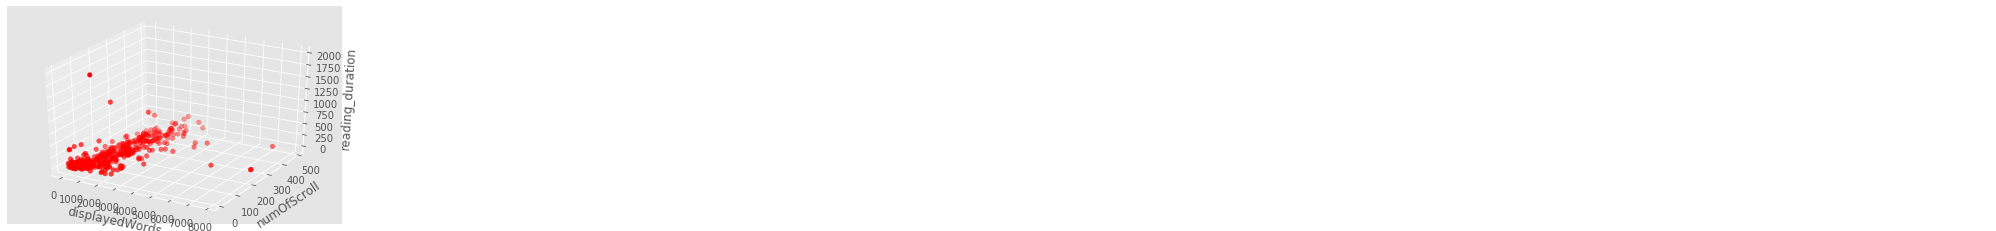

In [11]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
xData = data1['displayedWords']
yData = data1['numOfScroll']
zData = data1['reading_duration']


ax.set_xlabel('displayedWords')
ax.set_ylabel('numOfScroll')
ax.set_zlabel('reading_duration')

ax.scatter3D(xData, yData, zData, c='r', cmap='Greens');





In [12]:
from sklearn.preprocessing import StandardScaler
features = ['displayedWords', 'numOfScroll', 'reading_duration']
# Separating out the features
x = data1.loc[:, features].values
print(x)
x = StandardScaler().fit_transform(x)
#transformation here
print(x.shape)
print(x)

[[2281.0632   19.        9.    ]
 [1706.7652   65.       15.    ]
 [ 601.2515  254.       41.    ]
 ...
 [2287.7904   76.       10.    ]
 [1394.7618  281.      114.    ]
 [ 382.16     45.       57.    ]]
(417, 3)
[[ 1.18655035 -1.07892798 -0.42972997]
 [ 0.58671858 -0.73345923 -0.38376031]
 [-0.56794719  0.68596673 -0.18455845]
 ...
 [ 1.19357665 -0.65084713 -0.42206836]
 [ 0.26084324  0.88874187  0.37473909]
 [-0.79677969 -0.88366303 -0.06197269]]


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

(417,)
(417,)
(417, 2)


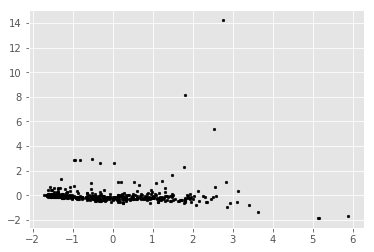

In [14]:
f1 = principalDf['principal component 1'].values
print(f1.shape)
f2= principalDf['principal component 2'].values
print(f2.shape)
x = np.array(list(zip(f1,f2)))
print(x.shape)
plt.scatter(f1,f2, c='black', s=7)
#filter data 1.filtered() 2.sql 



In [15]:
#num of clusters 
k = 4
kmeans = KMeans(n_clusters=k)

kmeans = kmeans.fit(x) #search in web
labels = kmeans.predict(x)
print(len(labels))
print(len(x))
print(len(principalDf))
centroids = kmeans.cluster_centers_
print(centroids) # five centres's coordiantion



417
417
417
[[ 0.226081   -0.14214484]
 [ 1.93292808 -0.22566998]
 [ 2.37504652  9.24934182]
 [-1.14150232  0.07782533]]


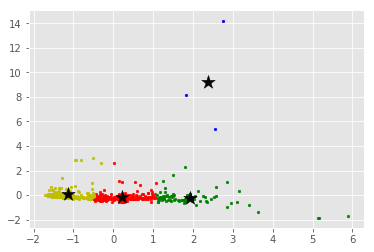

In [16]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([x[j] for j in range(len(x)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505') #five centres drawn by makers 

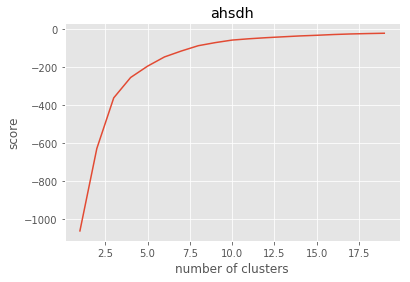

In [17]:
# 一个用来算最优 收敛的 算法 
Nc = range(1,20)
kmeans = [KMeans(n_clusters = i) for i in Nc] 
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
pl.plot(Nc, score)
pl.xlabel('number of clusters')
pl.ylabel('score')
pl.title('ahsdh')
pl.show()

In [18]:
data1['label'] = labels
data1



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,displayedWords,numOfScroll,reading_duration,label
2,2281.0632,19.0,9.0,0
3,1706.7652,65.0,15.0,0
6,601.2515,254.0,41.0,0
10,1908.6312,308.0,99.0,1
13,403.9776,25.0,4.0,3
14,1660.4038,110.0,27.0,0
15,2020.0248,485.0,215.0,1
19,54.3898,36.0,35.0,3
20,179.3546,9.0,35.0,3
21,205.5144,11.0,35.0,3


In [19]:
filtered_data['label'] = labels 
filtered_data.shape
filtered_data



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,user_id,reading_session,article_id,scroll_range,max_offset,ratio,displayedWords,reading_duration,numberOfWords,numOfScroll,freScroll,reading_speed,label
2,1.0,08988275-1dab-44b9-82c1-a126c16465e3,36321394.0,9356.0,8246.0,0.8814,2281.0632,9.0,2588,19.0,2.111111,15207.088000,0
3,1.0,0b773369-8de5-45bd-974f-b048b844defa,36329818.0,6104.0,4994.0,0.8182,1706.7652,15.0,2086,65.0,4.333333,6827.060800,0
6,1.0,0b773369-8de5-45bd-974f-b048b844defa,36331448.0,2086.0,976.0,0.4679,601.2515,41.0,1285,254.0,6.195122,879.880244,0
10,1.0,11f347a2-2f9c-4c55-9fd1-bc25b05ee6ad,33649334.0,8086.0,6996.0,0.8652,1908.6312,99.0,2206,308.0,3.111111,1156.746182,1
13,1.0,143f973d-1385-4c29-a639-676c0457f8ba,34067609.0,2596.0,702.0,0.2704,403.9776,4.0,1494,25.0,6.250000,6059.664000,3
14,1.0,19bcab60-2516-4114-9e09-0bf34ee906c8,32402688.0,6730.0,5604.0,0.8327,1660.4038,27.0,1994,110.0,4.074074,3689.786222,0
15,1.0,1b2cd602-d184-401c-bc1e-887af034cc5d,34204542.0,3822.0,2732.0,0.7148,2020.0248,215.0,2826,485.0,2.255814,563.727851,1
19,1.0,1d1e4635-3ffd-44a5-a59e-787d64d1270a,36392084.0,19906.0,576.0,0.0289,54.3898,35.0,1882,36.0,1.028571,93.239657,3
20,1.0,1d1e4635-3ffd-44a5-a59e-787d64d1270a,36392084.0,20094.0,1915.0,0.0953,179.3546,35.0,1882,9.0,0.257143,307.465029,3
21,1.0,1d1e4635-3ffd-44a5-a59e-787d64d1270a,36392084.0,21804.0,2380.0,0.1092,205.5144,35.0,1882,11.0,0.314286,352.310400,3


In [20]:
filtered_data = filtered_data.sort_values('label',ascending=False)
filtered_data


,user_id,reading_session,article_id,scroll_range,max_offset,ratio,displayedWords,reading_duration,numberOfWords,numOfScroll,freScroll,reading_speed,label
748,428.0,eb35eeac-f294-44a4-ae4a-f4472c04f268,45462999.0,2544.0,346.0,0.1360,382.1600,57.0,2810,45.0,0.789474,402.273684,3
224,250.0,25e0ef2f-e5e6-4370-b7dd-5e2f4d38114a,36786481.0,5124.0,165.0,0.0322,153.4008,29.0,4764,19.0,0.655172,317.380966,3
501,379.0,ca0ccb3f-a820-44dc-bde0-da8205f4c21d,41807702.0,2545.0,1098.0,0.4314,685.9260,26.0,1590,134.0,5.153846,1582.906154,3
498,379.0,a9dd39f7-df8c-4a93-b7a6-d37d5058e57e,41772372.0,10131.0,449.0,0.0443,433.8299,13.0,9793,31.0,2.384615,2002.291846,3
494,379.0,1a9430f5-498f-4f78-aec6-ca92414024f5,41788898.0,11604.0,470.0,0.0405,143.4915,18.0,3543,39.0,2.166667,478.305000,3
492,377.0,a2c531a9-0202-4b18-a4ab-054a17a1983f,41684111.0,4546.0,680.0,0.1496,405.7152,11.0,2712,12.0,1.090909,2212.992000,3
232,250.0,43520516-39a9-449a-9c1c-71aaa91ad32f,36754229.0,1731.0,66.0,0.0381,62.2935,29.0,1635,11.0,0.379310,128.883103,3
490,377.0,32c05cda-c5f3-417f-902c-5d1761b9089d,41683713.0,5688.0,700.0,0.1231,417.3090,3.0,3390,4.0,1.333333,8346.180000,3
234,250.0,5d068e98-43c8-4ff9-8026-9221f89e4a26,36778350.0,10044.0,2527.0,0.2516,714.7956,28.0,2841,131.0,4.678571,1531.704857,3
489,377.0,32c05cda-c5f3-417f-902c-5d1761b9089d,41683713.0,5284.0,685.0,0.1296,439.3440,3.0,3390,19.0,6.333333,8786.880000,3


In [21]:
group0 = filtered_data[filtered_data['label'] == 0]
group0
group1 = filtered_data[filtered_data['label'] == 1]
group1 
group2 = filtered_data[filtered_data['label'] == 2]
group2
group3 = filtered_data[filtered_data['label'] == 3]
group3

,user_id,reading_session,article_id,scroll_range,max_offset,ratio,displayedWords,reading_duration,numberOfWords,numOfScroll,freScroll,reading_speed,label
748,428.0,eb35eeac-f294-44a4-ae4a-f4472c04f268,45462999.0,2544.0,346.0,0.1360,382.1600,57.0,2810,45.0,0.789474,402.273684,3
224,250.0,25e0ef2f-e5e6-4370-b7dd-5e2f4d38114a,36786481.0,5124.0,165.0,0.0322,153.4008,29.0,4764,19.0,0.655172,317.380966,3
501,379.0,ca0ccb3f-a820-44dc-bde0-da8205f4c21d,41807702.0,2545.0,1098.0,0.4314,685.9260,26.0,1590,134.0,5.153846,1582.906154,3
498,379.0,a9dd39f7-df8c-4a93-b7a6-d37d5058e57e,41772372.0,10131.0,449.0,0.0443,433.8299,13.0,9793,31.0,2.384615,2002.291846,3
494,379.0,1a9430f5-498f-4f78-aec6-ca92414024f5,41788898.0,11604.0,470.0,0.0405,143.4915,18.0,3543,39.0,2.166667,478.305000,3
492,377.0,a2c531a9-0202-4b18-a4ab-054a17a1983f,41684111.0,4546.0,680.0,0.1496,405.7152,11.0,2712,12.0,1.090909,2212.992000,3
232,250.0,43520516-39a9-449a-9c1c-71aaa91ad32f,36754229.0,1731.0,66.0,0.0381,62.2935,29.0,1635,11.0,0.379310,128.883103,3
490,377.0,32c05cda-c5f3-417f-902c-5d1761b9089d,41683713.0,5688.0,700.0,0.1231,417.3090,3.0,3390,4.0,1.333333,8346.180000,3
234,250.0,5d068e98-43c8-4ff9-8026-9221f89e4a26,36778350.0,10044.0,2527.0,0.2516,714.7956,28.0,2841,131.0,4.678571,1531.704857,3
489,377.0,32c05cda-c5f3-417f-902c-5d1761b9089d,41683713.0,5284.0,685.0,0.1296,439.3440,3.0,3390,19.0,6.333333,8786.880000,3


In [22]:
print(group3['freScroll'].mean() ,
      group2['freScroll'].mean() ,
group1['freScroll'].mean() ,
group0['freScroll'].mean() ,
     )

2.53257973745614 0.15622073300000003 4.825333375717949 4.518978787169698


In [23]:
filtered_data.to_csv('speed_analysis.csv')

In [24]:
print(group3['reading_speed'].mean() ,
      group2['reading_speed'].mean() ,
group1['reading_speed'].mean() ,
group0['reading_speed'].mean() ,
     )

2076.7513401216947 78.63824687666666 2147.55045256923 2826.275613323636


In [25]:
print(group3['reading_duration'].mean() ,
      group2['reading_duration'].mean() ,
group1['reading_duration'].mean() ,
group0['reading_duration'].mean() ,
     )

40.84795321637427 1317.6666666666667 94.07692307692308 53.733333333333334


In [26]:
print(group3['numOfScroll'].mean() ,
      group2['numOfScroll'].mean() ,
group1['numOfScroll'].mean() ,
group0['numOfScroll'].mean() ,
     )

47.134502923976605 151.0 361.4230769230769 188.64242424242425


In [27]:
print(group3['displayedWords'].mean() ,
      group2['displayedWords'].mean() ,
group1['displayedWords'].mean() ,
group0['displayedWords'].mean() ,
     )

447.47906900584763 1395.9300666666666 2333.7753679487187 1301.412507272728
